# Evaluation Criteria 


## 1. Execution time of code= O(months X n ) , months=12,  n= number of counts of dates  with respect to a category

## 2. Code scalability- It will work for every dataset

## 3. Optimized code in terms of time & space complexity- Rather than traversing each record, we can just use counter to minimize iterations, so here only counts are important which decreases the code's time complexity

## 4. Correct choice of data structures- used pandas dataframe and numpy arrays

## 5. Visualizations- Graphs are provided for better understanding

## 6. Quality of output- Output is the graphs and Fractions alloted to each category for each month which are saved as screenshots. 

## 7. unit tests

# Task 2: 

## The following dataset contains transactions data: https://goo.gl/kTnPMn

## For every transaction, the following fields have been provided:

### product_id

### category

### date

## For each category in the dataset, find out if there is a seasonal pattern in purchase behaviour. Correspondingly, generate seasonal scores (Range: [0, 1]) for each category across seasons* to indicate seasonal relevance of the category at a given time period.

* Seasons can be constructed as months

# Target is to generate scores in range [0,1] for each of 4  category per month. 

# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Visualize Dataset

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('/content/gdrive/My Drive/MAD/transactions.csv')

In [3]:
data.head()

,transaction_id,product_id,category,date
0,1,662685,Casual Dress,01/10/2017
1,2,154881,Casual Dress,01/10/2017
2,3,220036,Casual Dress,01/10/2017
3,4,220036,Casual Dress,01/10/2017
4,5,950839,Pullover Sweater,01/10/2017


In [4]:
len(data) # 10 lac rows

1048575

In [0]:
categories= data['category']

In [6]:
categories[0:5]

0        Casual Dress
1        Casual Dress
2        Casual Dress
3        Casual Dress
4    Pullover Sweater
Name: category, dtype: object

# Finding categories and their counts from dataset

In [0]:
from collections import Counter 
cat_count=Counter(categories)

In [8]:
cat_count.keys()

dict_keys(['Casual Dress', 'Pullover Sweater', 'Sleeveless Blouse', 'Fleece Jacket'])

In [0]:
all_category=cat_count.keys()

# Plotting Categories vs Counts
## Fleece jacket has least count

<Figure size 720x360 with 0 Axes>

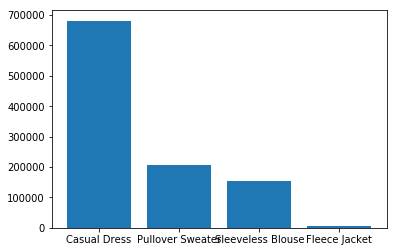

<Figure size 720x360 with 0 Axes>

In [10]:
plt.bar(cat_count.keys(),cat_count.values())
plt.figure(figsize=(10,5))
#plt.xlabel(cat_count.keys())

In [0]:
from tqdm import tqdm

# Finding out counts of different months

In [12]:
dates=[]
for i in tqdm(range(len(data))):
  dates.append(data.iloc[i]['date'][3:5])

100%|██████████| 1048575/1048575 [03:22<00:00, 5185.74it/s]


In [0]:
date_count=Counter(dates)

In [16]:
date_count

Counter({'01': 104302,
         '02': 138497,
         '03': 121324,
         '04': 88097,
         '05': 114558,
         '06': 89623,
         '07': 92848,
         '08': 15104,
         '10': 100841,
         '11': 95251,
         '12': 88130})

# Plotting counts of all 12 months

<Figure size 720x360 with 0 Axes>

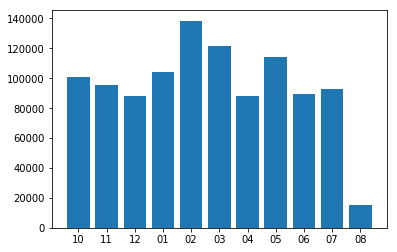

<Figure size 720x360 with 0 Axes>

In [17]:
plt.bar(date_count.keys(),date_count.values())
plt.figure(figsize=(10,5))

# Grouping dataframe by category

In [18]:
gp = data.groupby('category')
gp.first()

,transaction_id,product_id,date
category,,,
Casual Dress,1,662685,01/10/2017
Fleece Jacket,13,188834,01/10/2017
Pullover Sweater,5,950839,01/10/2017
Sleeveless Blouse,10,935727,01/10/2017


# Getting data by each group

In [0]:
cd= gp.get_group('Casual Dress') 
fj= gp.get_group('Fleece Jacket') 
ps= gp.get_group('Pullover Sweater') 
sb= gp.get_group('Sleeveless Blouse') 

# Their respective row counts

In [20]:
len(cd), len(fj), len(ps), len(sb)

(681032, 4974, 207355, 155214)

# Defining function which returns a list of 12 values containing counts of given category for 12 months

In [0]:
def func(data,category):
  
  cat_gp = data.groupby('category') # Grouping by a particular cateogry
  if category=='Casual Dress':
    given_cat= cat_gp.get_group('Casual Dress') # Get the dataframe having Casual dress only
  elif category=='Fleece Jacket':
    given_cat= cat_gp.get_group('Fleece Jacket')
  elif category=='Pullover Sweater':
    given_cat= cat_gp.get_group('Pullover Sweater')
  else:
    given_cat= cat_gp.get_group('Sleeveless Blouse')    
    
  cnt_cat=Counter(given_cat['date']) # create a counter for date with respect to given category 
  
  temp_df = pd.DataFrame.from_dict(cnt_cat,orient='index') # converting counter to temporary dataframe
  
  mnths=['01','02','03','04','05','06','07','08','09','10','11','12'] # list containing months
  lst=[]
  
  for i in mnths:   # looping over months
    cnt=0
    
    for j in range(len(temp_df)):  # looping over counter of dates for given category for calculating counts per month    
    
      if temp_df.index[j][3:5]==i:   # date[3:5] contains month value
        cnt+=temp_df.iloc[j][0]
        
    lst.append(cnt)
    
  return lst # returns list of counts over 12 months of each category

# Counts over months for each Category

In [0]:


cd=func(data,'Casual Dress')
fj=func(data,'Fleece Jacket')
ps=func(data,'Pullover Sweater')
sb=func(data,'Sleeveless Blouse')


In [23]:
sum(cd)+sum(fj)+sum(ps)+sum(sb)

1048575

# Plotting the counts of 4 categories over 12 months

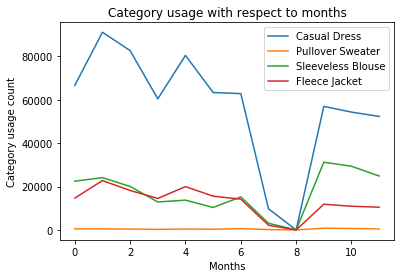

In [24]:
plt.plot(cd,label='Casual Dress')
plt.plot(fj,label='Pullover Sweater')
plt.plot(ps,label='Sleeveless Blouse')
plt.plot(sb,label='Fleece Jacket')
plt.title('Category usage with respect to months')
plt.xlabel('Months')
plt.ylabel('Category usage count')
plt.legend()


# Alloting fraction for  each month to each category using counts

In [0]:
# Converting li
cd=np.asarray(cd)
fj=np.asarray(fj)
ps=np.asarray(ps)
sb=np.asarray(sb)
comm=np.ones([4,12])
comm[0]=cd
comm[1]=fj
comm[2]=ps
comm[3]=sb

In [26]:
comm

array([[66649., 91162., 82695., 60434., 80490., 63372., 62865.,  9730.,
            0., 56963., 54334., 52338.],
       [  498.,   474.,   407.,   261.,   374.,   336.,   581.,   151.,
            0.,   798.,   645.,   449.],
       [22481., 24109., 20045., 12886., 13732., 10356., 15219.,  3072.,
            0., 31239., 29354., 24862.],
       [14674., 22752., 18177., 14516., 19962., 15559., 14183.,  2151.,
            0., 11841., 10918., 10481.]])

In [0]:
ratio=np.ones([4,12])
j=0
for i in range(4):
   for j in range(12):
      if sum(comm[:,j])!=0:   
        ratio[i][j]=comm[i][j]/sum(comm[:,j])
      else:
        ratio[i][j]=0

# Ratio array shape is 4 X 12 which contains monthwise fraction of each category 

In [28]:
ratio

array([[0.63900021, 0.65822364, 0.68160463, 0.68599385, 0.70261352,
        0.70709528, 0.67707436, 0.64420021, 0.        , 0.56487936,
        0.57042971, 0.59387269],
       [0.0047746 , 0.00342246, 0.00335465, 0.00296264, 0.00326472,
        0.00374904, 0.00625754, 0.00999735, 0.        , 0.00791345,
        0.00677158, 0.00509475],
       [0.21553757, 0.17407597, 0.16521875, 0.14627059, 0.11986941,
        0.1155507 , 0.16391306, 0.20338983, 0.        , 0.30978471,
        0.30817524, 0.28210598],
       [0.14068762, 0.16427793, 0.14982196, 0.16477292, 0.17425234,
        0.17360499, 0.15275504, 0.14241261, 0.        , 0.11742248,
        0.11462347, 0.11892659]])

# Plotting the 4 categories with respect to their share each month 

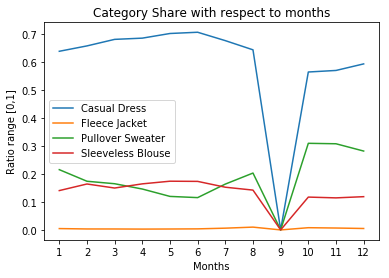

In [48]:
plt.plot(np.arange(1,13),ratio[0,:],label='Casual Dress') 
plt.plot(np.arange(1,13),ratio[1,:],label='Fleece Jacket')
plt.plot(np.arange(1,13),ratio[2,:],label='Pullover Sweater')
plt.plot(np.arange(1,13),ratio[3,:],label='Sleeveless Blouse')
plt.title('Category Share with respect to months')
plt.xticks(range(1,13),np.arange(1,13))
plt.xlabel('Months')
plt.ylabel('Ratio range [0,1]')
plt.legend()

# Curve Analysis

## 1. There is 0 sale in the month of September.
## 2. It can be seen that Casual Dress has highest demand throughout the year.
## 3. Pullover Sweater is more in deman in January to first week of April than Sleeveless Blouse.
## 4. From April to mid july, Sleeveless blouse is more in demand than Pullover Sweater.
## 5. In the month of August, Pullover sweater is higher in demand. 
## 5. After September, pullover sweater is again in demand.
## 6. Fleece Jacket is in least demand over all year. 




In [0]:
all_category=[i for i in all_category]

In [0]:
def plot_bar_x(i):
    # this is for plotting purpose
    index = np.arange(12)
    plt.bar(index, ratio[i,:])
    plt.xlabel('Months', fontsize=10)
    plt.ylabel('Ratio', fontsize=10)
    #plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title(all_category[i])
    plt.show()

# Plotting indiavidual bar plots for each category

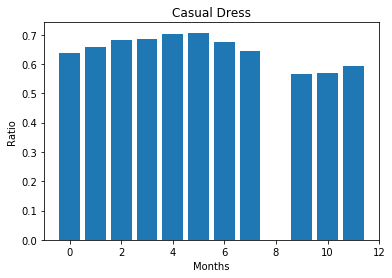

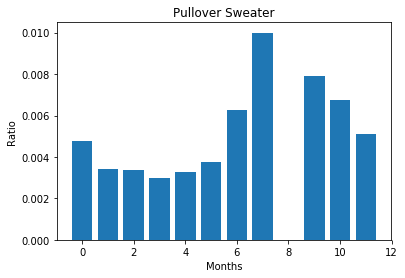

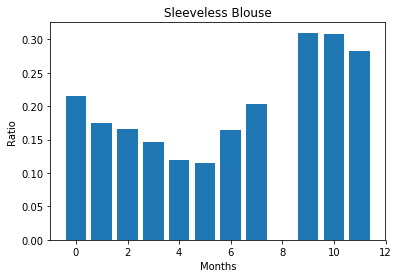

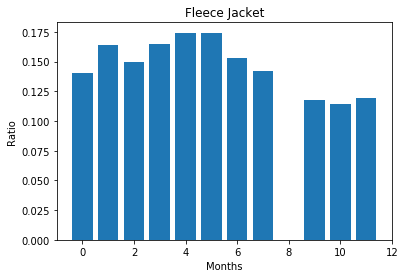

In [32]:
plot_bar_x(0)
plot_bar_x(1)
plot_bar_x(2)
plot_bar_x(3)
